In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('bank-additional-full.csv',delimiter=';')

In [3]:
from sklearn.preprocessing import LabelEncoder
data_dummies = pd.get_dummies(df)
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [16]:
from sklearn.tree import DecisionTreeClassifier

X = data_dummies.iloc[:,:62].values
y = data_dummies.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [11]:
tree = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=5)

tree.fit(X,y)
# 正確率
print('score', tree.score(X,y))

score 0.9171603379625134


In [12]:
import graphviz
import pydotplus
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image

dot_data = export_graphviz(tree,filled=True,rounded=True,
                          class_names=data_dummies.iloc[:,-1].name, out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('banktree.png')

True

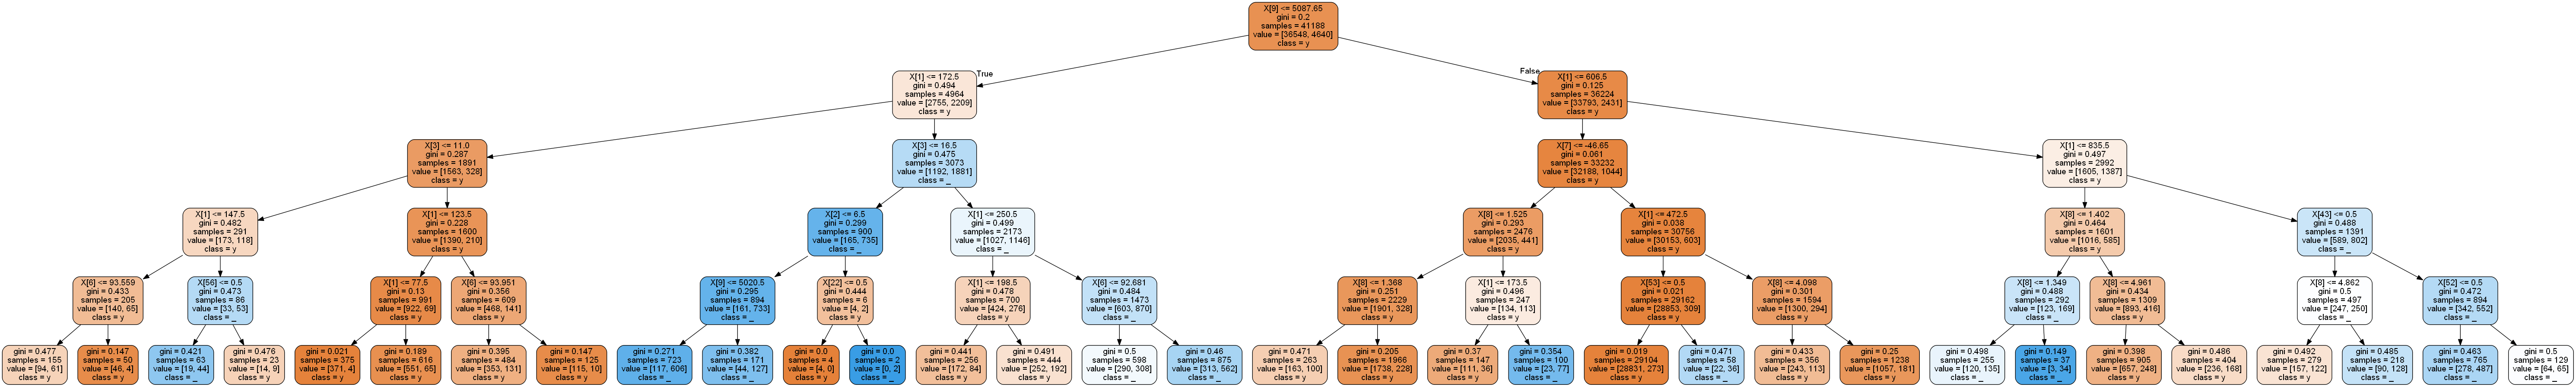

In [13]:
Image('banktree.png')